In [87]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
pub_art = pd.read_csv('../data/Art_in_Public_Places.csv')
print(pub_art.shape)
pub_art.head(3)

(164, 10)


,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)"
1,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)"


In [4]:
pub_art=pub_art.rename(columns={'Latitude':'lat','Longitude':'lng'})

In [5]:
pub_art.head()

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,lat,lng,Mapped Location
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)"
1,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)"
3,Blowing Bubbles,Faxon,Russell,"4715 Harding Pike, Nashville TN",Bronze,Sculpture,NaN,36.11975,-86.85343,"(36.11975, -86.85343)"
4,Anticipation,Faxon,Russell,"505 Deaderick Street, Nashville TN",Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.16489,-86.78184,"(36.16489, -86.78184)"


In [6]:
pub_art['geometry'] = pub_art.apply(lambda x: Point((x.lng,x.lat)),
                                        axis=1)


In [7]:
pub_art = gpd.GeoDataFrame(pub_art, 
                           crs = zipcodes.crs, 
                           geometry = pub_art['geometry'])

In [8]:
type(pub_art)

geopandas.geodataframe.GeoDataFrame

In [9]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

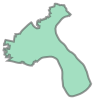

In [118]:
zipcodes.geometry[0]

In [10]:
pub_art.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              164 non-null    object  
 1   Artist Last Name   164 non-null    object  
 2   Artist First Name  159 non-null    object  
 3   Location           164 non-null    object  
 4   Medium             162 non-null    object  
 5   Type               164 non-null    object  
 6   Description        107 non-null    object  
 7   lat                162 non-null    float64 
 8   lng                162 non-null    float64 
 9   Mapped Location    162 non-null    object  
 10  geometry           164 non-null    geometry
dtypes: float64(2), geometry(1), object(8)
memory usage: 14.2+ KB


In [11]:
art_by_zip =  gpd.sjoin(pub_art, zipcodes, op = 'within')

In [12]:
art_by_zip.head()

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,lat,lng,Mapped Location,geometry,index_right,zip,po_name
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)",POINT (-86.77491 36.16240),36,37201,NASHVILLE
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)",POINT (-86.77594 36.15961),36,37201,NASHVILLE
11,Orpheus and Eurydice,Kaskey,Ray,"1 Symphony Place, Nashville TN",Limestone,Sculpture,Relief sculpture above main entrance of Scherm...,36.16017,-86.77575,"(36.16017, -86.77575)",POINT (-86.77575 36.16017),36,37201,NASHVILLE
21,The Birth of Apollo,Eskridge,Casey,"1 Symphony Place, Nashville TN",Bronze sculpture as centerpiece of fountain,Sculpture,"Two figures topping a fountain, one with a lyr...",36.15993,-86.77611,"(36.15993, -86.77611)",POINT (-86.77611 36.15993),36,37201,NASHVILLE
24,The Recording Angel,Flack,Audrey,"1 Symphony Place, Nashville TN",Bronze,Sculpture,Bronze angel holding a fountain pen and tablet,36.15920,-86.77571,"(36.1592, -86.77571)",POINT (-86.77571 36.15920),36,37201,NASHVILLE


In [135]:
art_by_zip['Artist Last Name'].value_counts()

Faxon                          10
LeQuire                         8
Cooper                          7
Rudloff                         7
Mims                            6
                               ..
The Kubach - Wilmsen Team       1
Shields                         1
Houge and Meek and Swensson     1
McGraw                          1
Ulibarri                        1
Name: Artist Last Name, Length: 102, dtype: int64

In [54]:
art_by_zip_37219 = art_by_zip.loc[art_by_zip['zip'] == '37219'];
art_by_zip_37219.head()

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,lat,lng,Mapped Location,geometry,index_right,zip,po_name
4,Anticipation,Faxon,Russell,"505 Deaderick Street, Nashville TN",Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.16489,-86.78184,"(36.16489, -86.78184)",POINT (-86.78184 36.16489),24,37219,NASHVILLE
5,Piecing It All Together,Cooper,Michael,"600 Church Street, Nashville TN",Painting on Stone,Mural,NaN,36.16281,-86.78186,"(36.16281, -86.78186)",POINT (-86.78186 36.16281),24,37219,NASHVILLE
7,Chet Atkins,Faxon,Russell,"Corner of Fifth Avenue North and Union Street,...",Bronze stool and guitar on a granite plynth,Sculpture,A sculpture of a young Chet Atkins seated on a...,36.16466,-86.78102,"(36.16466, -86.78102)",POINT (-86.78102 36.16466),24,37219,NASHVILLE
10,Women Suffrage Memorial,LeQuire,Alan,"600 Charlotte Avenue, Nashville TN",Bronze sculpture,Sculpture,NaN,36.16527,-86.78382,"(36.16527, -86.78382)",POINT (-86.78382 36.16527),24,37219,NASHVILLE
13,Foliated Scroll,Bloomer,Kent,"615 Church Street, Nashville TN",Aluminum,Frieze,a contemporary adaptation of a classical folia...,36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-86.78205 36.16215),24,37219,NASHVILLE


In [55]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.head()

,zip,po_name,geometry
24,37219,NASHVILLE,"MULTIPOLYGON (((-86.78609 36.17465, -86.78585 ..."


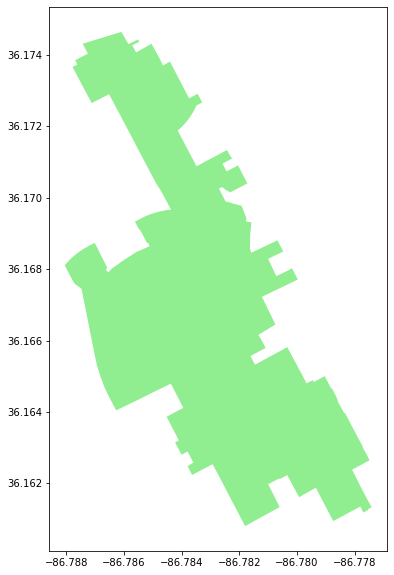

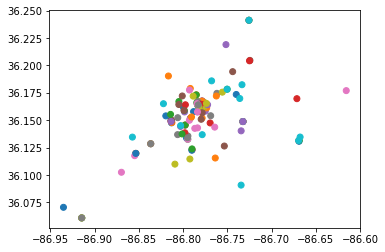

In [30]:
#fig, ax = matplotlib.subplots()
ax = polygon37219.plot(figsize = (8, 10), color = 'lightgreen')
art_by_zip.plot( column = 'Title');
plt.show();

In [41]:
center_37219 = polygon37219.geometry.centroid[24]
print(center_37219)

POINT (-86.78317337070099 36.16681838008157)


C:\Users\RMAUR\AppData\Local\Temp/ipykernel_5204/4078123834.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_37219 = polygon37219.geometry.centroid[24]


In [64]:
center_nashville=zipcodes.geometry.centroid[27]
print(center_nashville)

POINT (-86.8903861188125 36.20504747004688)


C:\Users\RMAUR\AppData\Local\Temp/ipykernel_5204/1723475808.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_nashville=zipcodes.geometry.centroid[27]


In [42]:
area_center_37219 = [center_37219.y, center_37219.x]

# check the order of area_center, the location for our folium map
print(area_center_37219)

[36.16681838008157, -86.783173370701]


In [66]:
area_center_nash = [center_nashville.y,center_nashville.x]
print(area_center_nash)

[36.20504747004688, -86.8903861188125]


In [132]:
#draw our zip code area: 37207
map_nashville = folium.Map(location =  area_center_nash, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(map_nashville)

folium.GeoJson(zipcodes).add_to(map_nashville)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in art_by_zip.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    mzip = [row_values['zip']]
    pop = str(row_values['Title']),str(row_values['Description'])
    icon=folium.Icon(color="blue",icon="info-sign", prefix='fa')
    
    if row_values['Description'] == 'nan':
        str('')

    art_marker = folium.Marker(
        location = loc ,
        popup = pop, icon = icon) 


    art_marker.add_to(marker_cluster)
map_37219.save('../maps/mapnashville.html')

#display our map
map_nashville

In [51]:
art_by_zip_37219.head(3)

,zip,po_name,geometry
24,37219,NASHVILLE,"MULTIPOLYGON (((-86.78609 36.17465, -86.78585 ..."


In [126]:
help(folium.features.GeoJsonTooltip)

Help on class GeoJsonTooltip in module folium.features:

class GeoJsonTooltip(GeoJsonDetail)
 |  GeoJsonTooltip(fields, aliases=None, labels=True, localize=False, style=None, class_name='foliumtooltip', sticky=True, **kwargs)
 |  
 |  Create a tooltip that uses data from either geojson or topojson.
 |  
 |  Parameters
 |  ----------
 |  fields: list or tuple.
 |      Labels of GeoJson/TopoJson 'properties' or GeoPandas GeoDataFrame
 |      columns you'd like to display.
 |  aliases: list/tuple of strings, same length/order as fields, default None.
 |      Optional aliases you'd like to display in the tooltip as field name
 |      instead of the keys of `fields`.
 |  labels: bool, default True.
 |      Set to False to disable displaying the field names or aliases.
 |  localize: bool, default False.
 |      This will use JavaScript's .toLocaleString() to format 'clean' values
 |      as strings for the user's location; i.e. 1,000,000.00 comma separators,
 |      float truncation, etc.
 |